In [1]:
#workingoin multi class dataset

In [2]:
import torch
from torch import nn
import numpy as np
import requests
from pathlib import Path 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from helper_functions import plot_predictions, plot_decision_boundary

In [3]:
#setting hyperparameter for working

In [4]:
NUM_CLASSES =4
NUM_FEATURES =2
RANDOM_SEED =42

X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,
    random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
X_blob[:5], y_blob[:5]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 tensor([3, 2, 2, 1, 1]))

In [5]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

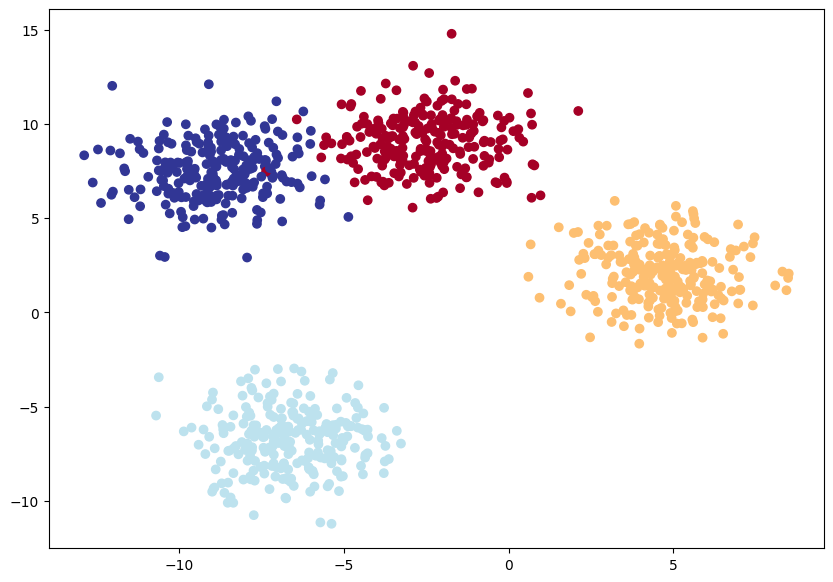

In [6]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [7]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=8),
            nn.Linear(in_features=8, out_features=8),
            nn.Linear(in_features=8, out_features=output_features))
    
    def forward(self, x):
        return self.linear_layer_stack(x)

In [8]:
Model_MR = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8)
Model_MR

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(Model_MR.parameters(), 
                            lr=0.01)

In [10]:
Model_MR.eval()
with torch.inference_mode():
    y_logits=Model_MR(X_blob_train)

In [11]:
y_logits[:10]

tensor([[-1.0063, -0.4675, -0.4781,  0.3671],
        [-0.7126,  0.3042, -1.0103,  0.8067],
        [ 1.8043,  0.7345,  1.2071, -0.1121],
        [ 1.0583,  0.5295,  0.6348,  0.1015],
        [-0.4019,  0.3559, -0.7350,  0.6922],
        [-0.9444, -0.0308, -0.8906,  0.6674],
        [-0.5620,  0.4663, -1.0271,  0.8550],
        [-0.7905, -0.3569, -0.3687,  0.3442],
        [ 0.2801,  0.7526, -0.4413,  0.6555],
        [-0.4828,  0.4039, -0.8740,  0.7686]])

In [12]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [13]:
y_preds_probs=torch.softmax(y_logits, dim=1) #passing logit to softmax function
y_preds_probs[:10]

tensor([[0.1196, 0.2051, 0.2029, 0.4724],
        [0.1102, 0.3046, 0.0818, 0.5034],
        [0.4901, 0.1681, 0.2697, 0.0721],
        [0.3805, 0.2242, 0.2491, 0.1462],
        [0.1463, 0.3121, 0.1048, 0.4368],
        [0.1046, 0.2608, 0.1104, 0.5242],
        [0.1170, 0.3271, 0.0735, 0.4825],
        [0.1393, 0.2149, 0.2124, 0.4333],
        [0.2200, 0.3529, 0.1069, 0.3202],
        [0.1316, 0.3194, 0.0890, 0.4600]])

In [14]:
y_logits, y_preds_probs

(tensor([[-1.0063, -0.4675, -0.4781,  0.3671],
         [-0.7126,  0.3042, -1.0103,  0.8067],
         [ 1.8043,  0.7345,  1.2071, -0.1121],
         ...,
         [-0.8427,  0.2217, -1.0589,  0.8085],
         [ 1.4124,  0.5856,  0.9516, -0.0311],
         [ 0.5357,  0.8775, -0.3052,  0.6238]]),
 tensor([[0.1196, 0.2051, 0.2029, 0.4724],
         [0.1102, 0.3046, 0.0818, 0.5034],
         [0.4901, 0.1681, 0.2697, 0.0721],
         ...,
         [0.1008, 0.2923, 0.0812, 0.5256],
         [0.4340, 0.1898, 0.2737, 0.1025],
         [0.2544, 0.3581, 0.1097, 0.2778]]))

In [15]:
torch.sum(y_preds_probs[1])

tensor(1.)

In [16]:
torch.sum(y_logits[1])

tensor(-0.6120)

In [17]:
y_preds=torch.argmax(y_preds_probs, dim=1)
y_preds

tensor([3, 3, 0, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1, 0, 1, 0, 3, 3, 1, 0, 0, 0, 1, 3,
        1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 0, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3,
        3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0,
        1, 3, 3, 3, 0, 3, 3, 3, 0, 1, 3, 1, 1, 0, 1, 1, 0, 0, 3, 3, 3, 3, 0, 3,
        3, 3, 0, 3, 1, 1, 1, 3, 0, 3, 0, 1, 3, 3, 0, 3, 1, 1, 0, 3, 0, 3, 1, 0,
        3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 3, 1, 3, 1, 3, 0, 3, 3,
        0, 0, 0, 1, 3, 3, 3, 3, 3, 0, 3, 1, 0, 3, 1, 0, 1, 3, 1, 3, 3, 0, 0, 0,
        0, 0, 0, 3, 1, 1, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 0, 1, 1, 1,
        3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 1, 0,
        3, 0, 3, 1, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0,
        0, 3, 3, 3, 3, 0, 1, 3, 0, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 0, 1, 1, 3, 3,
        0, 0, 0, 0, 1, 3, 0, 0, 3, 0, 1,

In [18]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [19]:
def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true, y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

In [20]:
#Creating Training Loop MultiClass

In [21]:
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
    Model_MR.train()
    
    y_logits = Model_MR(X_blob_train)  
    y_pred = y_logits.argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)  
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    Model_MR.eval()
    with torch.inference_mode():
        test_logits = Model_MR(X_blob_test)
        test_pred = test_logits.argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.54660, Acc: 5.75% | Test Loss: 1.39648, Test Acc: 28.00%
Epoch: 10 | Loss: 0.98848, Acc: 62.88% | Test Loss: 0.93982, Test Acc: 66.00%
Epoch: 20 | Loss: 0.77381, Acc: 71.88% | Test Loss: 0.74427, Test Acc: 74.50%
Epoch: 30 | Loss: 0.63161, Acc: 73.50% | Test Loss: 0.61216, Test Acc: 75.00%
Epoch: 40 | Loss: 0.52611, Acc: 86.12% | Test Loss: 0.51344, Test Acc: 85.50%
Epoch: 50 | Loss: 0.44554, Acc: 93.88% | Test Loss: 0.43747, Test Acc: 96.00%
Epoch: 60 | Loss: 0.38307, Acc: 96.12% | Test Loss: 0.37802, Test Acc: 98.00%
Epoch: 70 | Loss: 0.33393, Acc: 96.75% | Test Loss: 0.33075, Test Acc: 98.00%
Epoch: 80 | Loss: 0.29465, Acc: 97.25% | Test Loss: 0.29259, Test Acc: 98.00%
Epoch: 90 | Loss: 0.26276, Acc: 97.62% | Test Loss: 0.26133, Test Acc: 98.50%


In [22]:
Model_MR.eval()
with torch.inference_mode():
    y_logits = m=Model_MR(X_blob_test)

y_logits[:10]

tensor([[ 0.2963,  1.2436, -3.0888, -1.8479],
        [ 2.0807, -5.3347, -0.7554,  3.3267],
        [-1.7514, -0.4482,  5.7727,  2.5270],
        [-0.4361,  1.7016, -1.2467, -1.4695],
        [ 2.1618, -2.5756, -4.4678,  0.1491],
        [ 2.4914, -6.4299, -0.7412,  4.0503],
        [-2.1101,  0.6219,  5.6183,  1.7682],
        [ 2.0705, -3.2112, -3.3732,  0.9693],
        [-1.3927, -1.9116,  6.4175,  3.7244],
        [ 2.0574, -2.9168, -3.6977,  0.6567]])

In [23]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = y_pred_probs.argmax(dim=1)

y_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

In [24]:
accuracy_fn(y_true=y_blob_test, y_pred=y_preds)

99.0

In [25]:
request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
    f.write(request.content)

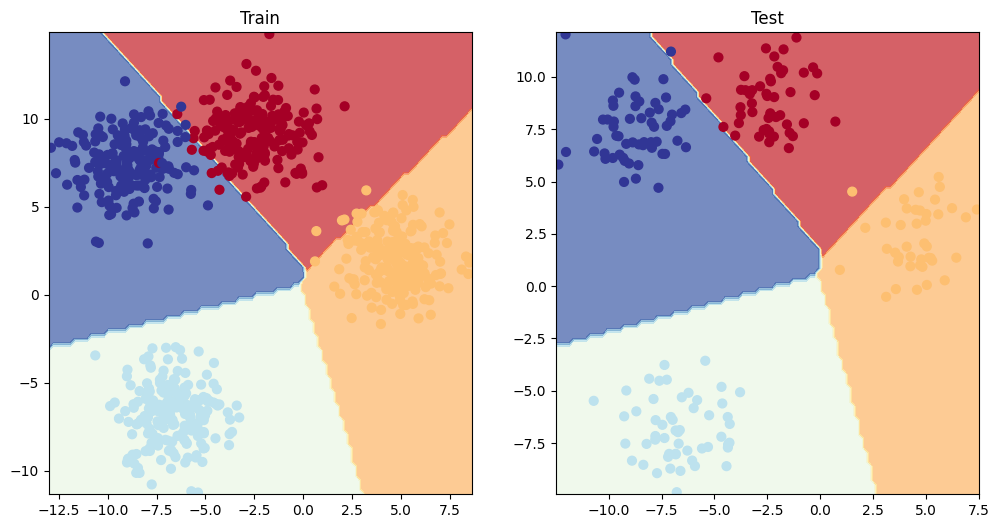

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(Model_MR, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(Model_MR, X_blob_test, y_blob_test)

In [30]:
from torchmetrics import Accuracy
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4)
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9900)